# Backtesting
---

In [25]:
import numpy as np
import pandas as pd

import FinanceDataReader as fdr
import datetime

cluster0  
<img width="1006" alt="image" src="https://user-images.githubusercontent.com/88031549/203972147-fc86531d-febd-41c7-922a-22e9648e4e88.png">

cluster3  
<img width="1033" alt="image" src="https://user-images.githubusercontent.com/88031549/203954456-ec3bd1bb-3e7f-498c-9c12-ab704fcebcb2.png">

cluster10  
<img width="991" alt="image" src="https://user-images.githubusercontent.com/88031549/203972417-10489cbd-f662-4f4c-9f0c-ada7e5aaecb4.png">

# 1. Data 불러오기

In [50]:
# 백테스팅 기간 : 2021.04.01 ~ 2022.03.31
start = datetime.datetime(2021, 4, 1)
end = datetime.datetime(2022, 3, 31)

df = fdr.DataReader("006650", start, end)
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-04-01,327000,328000,317000,322000,47488,-0.010753
2021-04-02,326000,328000,320000,321500,41740,-0.001553
2021-04-05,323500,323500,304000,305000,130733,-0.051322
2021-04-06,305000,305500,292000,296000,123624,-0.029508
2021-04-07,297000,300500,292500,298500,52077,0.008446
...,...,...,...,...,...,...
2022-03-25,164000,164000,159000,160000,27135,-0.018405
2022-03-28,159500,162000,157500,160000,19745,0.000000
2022-03-29,161000,163500,161000,163000,23822,0.018750


# 2. Data check & plot

<AxesSubplot: xlabel='Date'>

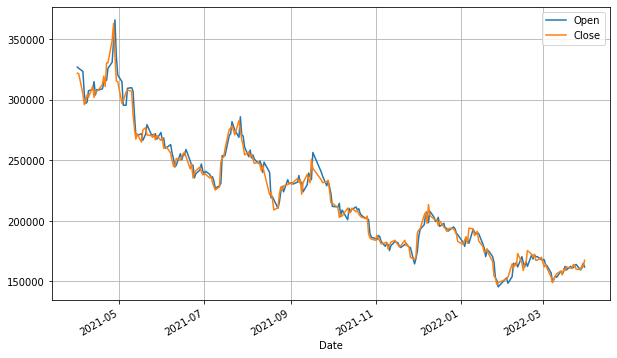

In [52]:
# 시가, 종가 확인
df.plot(y = ['Open', 'Close'], figsize = [10,6], grid = True)

<AxesSubplot: xlabel='Date'>

/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserW

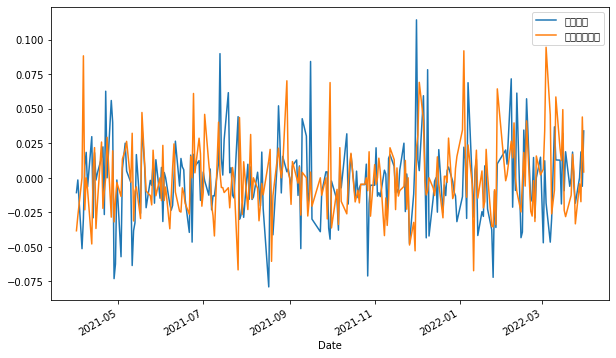

In [54]:
# 변동(change) 확인 : 대한유화, 삼일씨엔에스
df_1 = fdr.DataReader("006650", start, end)
df_2 = fdr.DataReader("004440", start, end)

df = pd.DataFrame()
df['대한유화'] = df_1['Change']
df['삼일씨엔에스'] = df_2['Change']

# df.tail(100).plot(figsize = [10, 6]) # 최근 100일
df.plot(figsize = [10, 6])

# 3. 장단기 이평선에 따른 수익률 계산

In [27]:
def get_return_sl(code, short, long):
    
    # 백테스팅 기간 : 2021.04.01 ~ 2022.03.31
    start = datetime.datetime(2021, 4, 1)
    end = datetime.datetime(2022, 3, 31)

    df = fdr.DataReader(code, start, end)
    df = df[['Close']].copy()

    df['ma1'] = df['Close'].rolling(short).mean().shift(1)
    df['ma2'] = df['Close'].rolling(long).mean().shift(1)

    df['action'] = np.where(df['ma1'] > df['ma2'], 'buy', 'sell')

    df.iloc[-1, -1] = 'sell'

    cond1 = ( df['action'] == 'buy') & ( df['action'].shift(1) == 'sell')
    cond2 = ( df['action'] == 'sell') & ( df['action'].shift(1) == 'buy')

    df_buy = df[cond1].reset_index()
    df_buy.columns = ['날짜', '종가(buy)', '이평3일', '이평30일', '결정']

    df_sell = df[cond2].reset_index()
    df_sell.columns = ['날짜', '종가(sell)', '이평3일', '이평30일', '결정']

    df_result = pd.concat([df_buy, df_sell], axis = 1)

    df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)'] 

    df_final = (df_result[['수익률']].cumprod().tail(1) -1)*100

    df_final['단기 이평'] = short
    df_final['장기 이평'] = long

    return df_final

## 3-1. cluster0

In [43]:
list_cluster0 = ['226320', '149980', '002310', '081580', '109080', '009680', '100660', '067830', '008110', '066670']

dfs = list()
for i in list_cluster0:
    dfs.append(get_return_sl(i, 10 ,50))
df_result = pd.concat(dfs)
df_result.reset_index(drop=True, inplace=True)
print(sum(df_result["수익률"])/10)
df_result

-0.6870524114938085


,수익률,단기 이평,장기 이평
0,-11.804679,10,50
1,42.334743,10,50
2,-9.639451,10,50
3,-6.671244,10,50
4,49.949018,10,50
5,-22.246875,10,50
6,-33.320403,10,50
7,-6.960224,10,50
8,-15.932983,10,50
9,7.421573,10,50


## 3-2. cluster3

In [42]:
list_cluster3 = ['006650', '004440', '100130', '084010', '011500', '121440', '147760', '210540', '108320', '025540']

dfs = list()
for i in list_cluster3:
    dfs.append(get_return_sl(i, 10 ,50))
df_result = pd.concat(dfs)
df_result.reset_index(drop=True, inplace=True)
print(sum(df_result["수익률"])/10)
df_result

-8.938132947169704


,수익률,단기 이평,장기 이평
0,-14.557791,10,50
1,9.182599,10,50
2,-38.076389,10,50
3,-23.008123,10,50
4,-9.568654,10,50
5,-12.788155,10,50
6,-15.127726,10,50
7,7.168459,10,50
8,19.646190,10,50
9,-12.251740,10,50


## 3-3. cluster10

In [44]:
list_cluster10 = ['023800', '042600', '001230', '043260', '001120', '019490', '010060', '200880', '137400', '114810']

dfs = list()
for i in list_cluster10:
    dfs.append(get_return_sl(i, 10 ,50))
df_result = pd.concat(dfs)
df_result.reset_index(drop=True, inplace=True)
print(sum(df_result["수익률"])/10)
df_result

4.37699659068355


,수익률,단기 이평,장기 이평
0,-15.522656,10,50
1,143.597738,10,50
2,-35.833406,10,50
3,-10.101588,10,50
4,4.531965,10,50
5,-67.144531,10,50
6,-9.081456,10,50
7,-35.791299,10,50
8,73.988375,10,50
9,-4.873177,10,50


## 3-4. 최적이평선 찾기

In [ ]:
# 최적이평선 찾기
dfs = []
for short in range(3, 11):
    for long in range(30, 61):
        df = get_return_sl('006650', short, long)
        dfs.append(df)

df_result = pd.concat(dfs)
df_result.sort_values(by = '수익률', ascending = False)

# 4. 최종 수익률

In [49]:
final = pd.DataFrame({"Buy&hold수익률":[-0.98,23.62,14.84, (-0.98+23.62+14.84)/3], "이평선(10-50)수익률":[-8.94,-0.69,4.38,(-8.94-0.69+4.38)/3], "이평선(10-60)수익률":[-5.59,-12.97,7.74,(-5.59-12.97+7.74)/3]}, index=["cluster0","cluster3","cluster10","Total수익률"])
final

,Buy&hold수익률,이평선(10-50)수익률,이평선(10-60)수익률
cluster0,-0.980000,-8.94,-5.590000
cluster3,23.620000,-0.69,-12.970000
cluster10,14.840000,4.38,7.740000
Total수익률,12.493333,-1.75,-3.606667


끝!